In [2]:
print("Hello World!")

Hello World!


In [8]:
#downlord the data
import os #talk to your operating system(create folder and path)
import tarfile #open and extract(.tar.gz (aka .tgz) archives)
import urllib.request #downlords files from the internet

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #based URL where the books data lives(github raw files)
HOUSING_PATH = os.path.join("datasets", "housing") #Local folder where you’ll store the data: datasets/housing.Using os.path.join keeps it cross-platform (Windows/Mac/Linux)
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #Full URL to the compressed dataset (housing.tgz)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path) #if the folder dosen't exit create it (including any missing parent folders)
    tgz_path = os.path.join(housing_path, "housing.tgz") #where to safe the downloaded file locally datasets/housing/housing.tgz.
    urllib.request.urlretrieve(housing_url, tgz_path) #Download the .tgz file from GitHub to tgz_path
    housing_tgz = tarfile.open(tgz_path) #Open the tar archive, extract everything into datasets/housing/, then close the archive. After this, you’ll have datasets/housing/housing.csv (that’s the file you’ll load with pandas)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [9]:
import pandas as pd #pandas is a library for data analysis

def load_housing_data(housing_path=HOUSING_PATH): #Defines a function named load_housing_data
    csv_path = os.path.join(housing_path, "housing.csv") #builds the full file path to data set
    return pd.read_csv(csv_path) #pd.read_csv() reads the CSV file into a DataFrame (pandas’ table structure).

In [10]:
#data structure
housing = load_housing_data() 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info() #summary of the entire dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing["ocean_proximity"].value_counts() #shows how many houses belong to each ocean proximity category in the dataset.

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
housing.describe() #summarize key statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


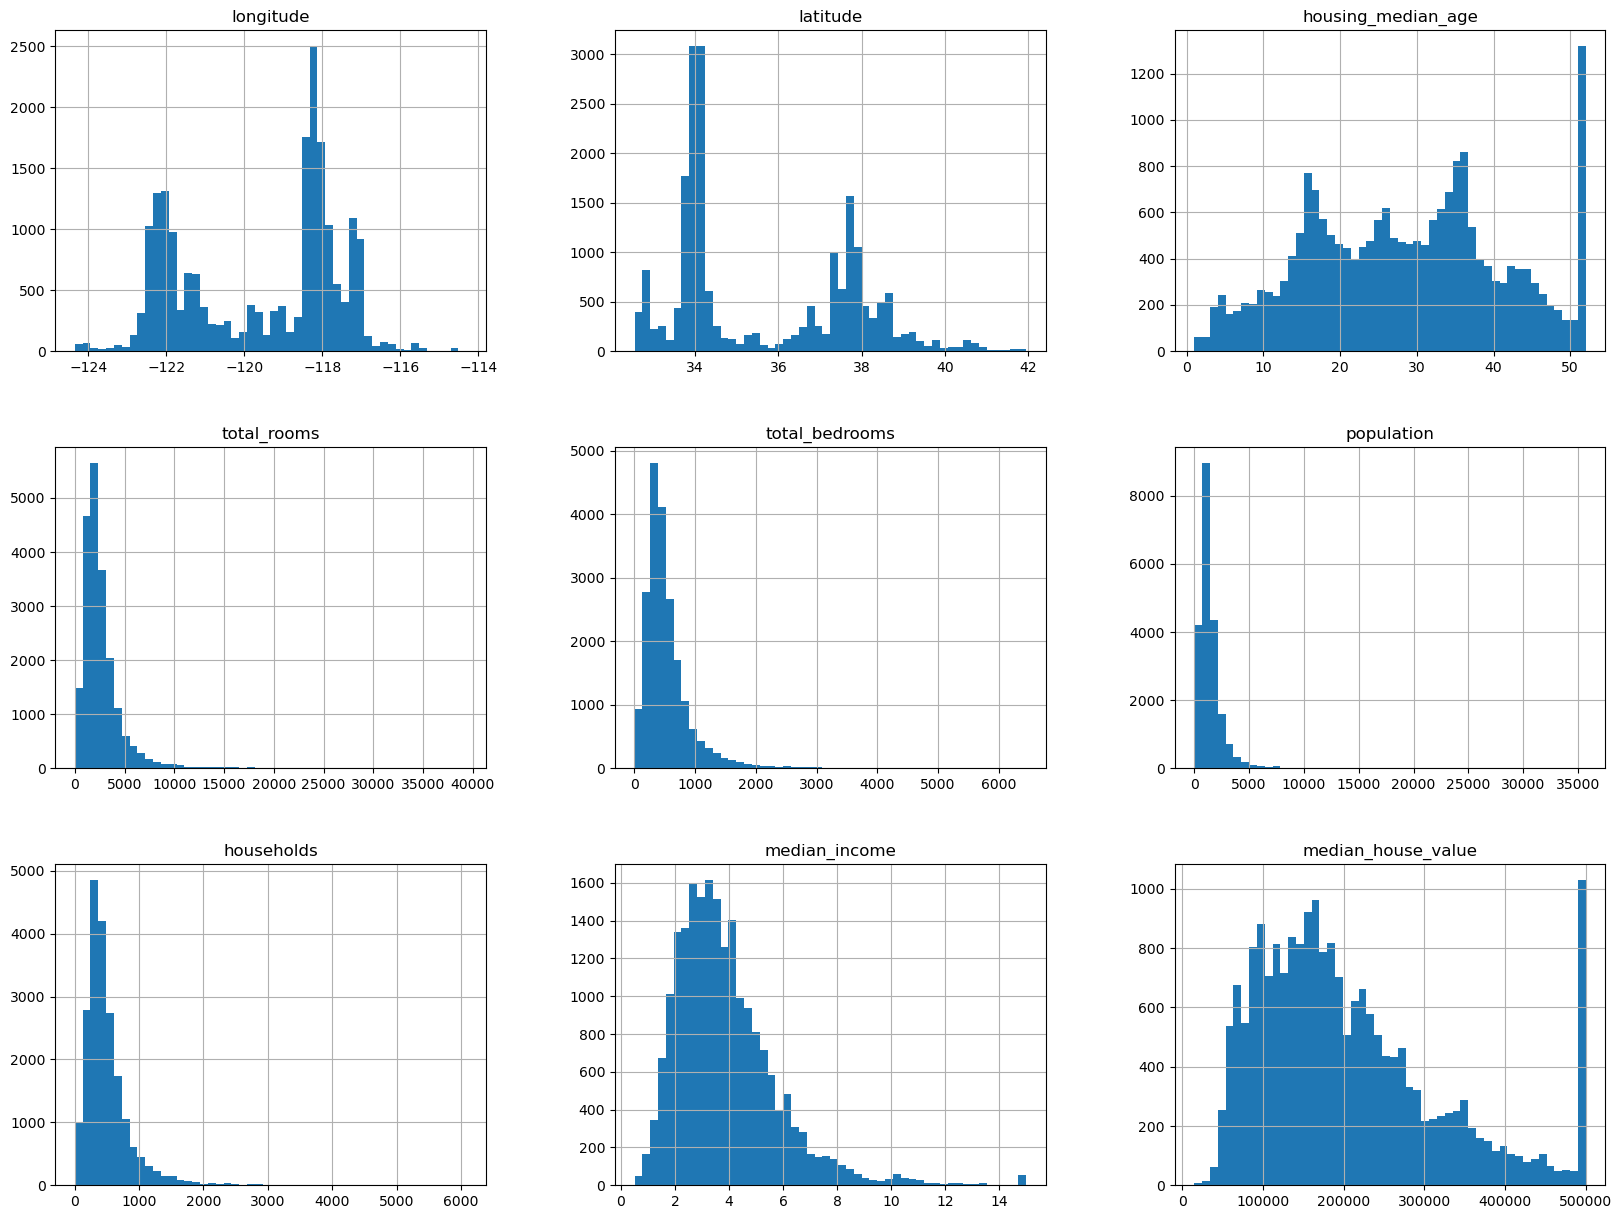

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) #.hist() is a pandas function that draws a histogram for each numeric column in the DataFrame and each histogram is divided into 50 intervals (more bins = more detail), makes the whole grid of plots 20x15 inches (big enough to see clearly)
plt.show()

In [20]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [22]:
len(test_set)

4128

In [23]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [35]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index") #unique ID (index) for each row and then uses it to split the housing dataset into stable train and test sets (80% / 20%).

In [36]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [37]:
test_set.head() #shows the first 5 rows of the test set (20% of the housing dataset), letting you verify the split worked.

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [38]:
 from sklearn.model_selection import train_test_split 
 train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #This code splits the housing dataset into training (80%) and test (20%) sets using Scikit-Learn, with random_state=42 to make the split reproducible.

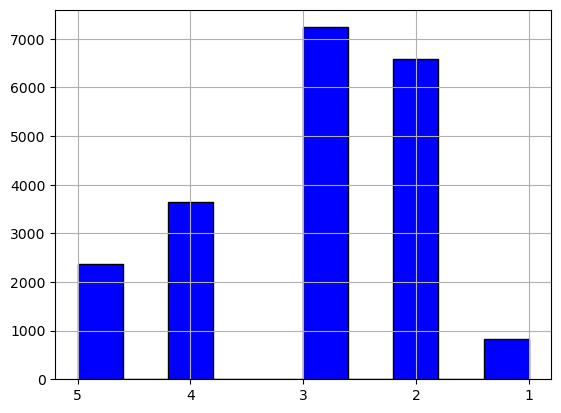

In [52]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=["1", "2", "3", "4", "5"]  # strings, not numbers 
)

housing["income_cat"].hist(color="blue", edgecolor="black")
plt.show()


In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
 
for train_index, test_index in split.split(housing, housing["income_cat"]):
     strat_train_set = housing.loc[train_index]
     strat_test_set = housing.loc[test_index] #This code creates train/test sets using stratified sampling based on income_cat, ensuring the income distribution in both sets matches the full dataset.

In [54]:
 >>> strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the bins and labels again
bins   = [0., 1.5, 3.0, 4.5, 6., np.inf]
labels = [1, 2, 3, 4, 5]

# Function to compute proportions by recreating income_cat each time
def income_cat_proportions(data):
    income_cat = pd.cut(data["median_income"], bins=bins, labels=labels)
    return income_cat.value_counts(normalize=True).sort_index()

# Make a random split (for comparison)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Compare distributions
compare_props = pd.DataFrame({
    "Overall":    income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random":     income_cat_proportions(test_set),
})

# Calculate percentage errors
compare_props["Rand. %error"]  = 100 * compare_props["Random"]     / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
median_income,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [62]:
 housing = strat_train_set.copy()

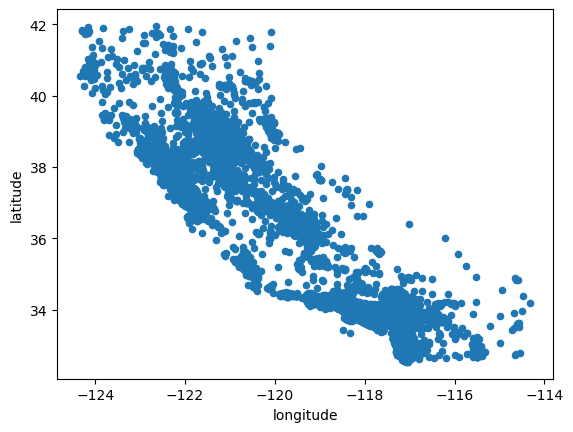

In [68]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

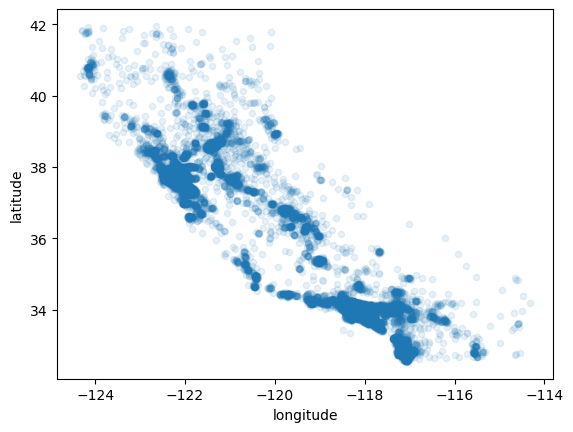

In [71]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

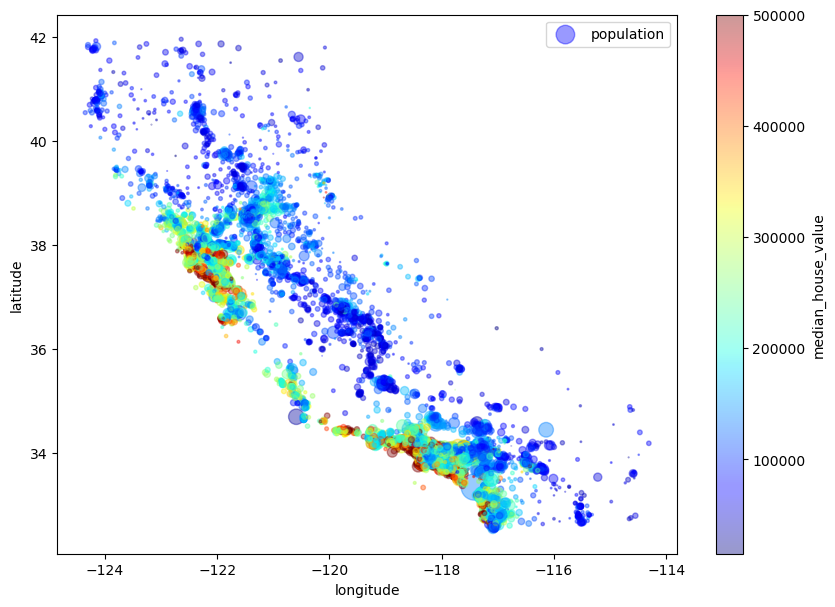

In [93]:
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False
)
plt.legend()
plt.show()

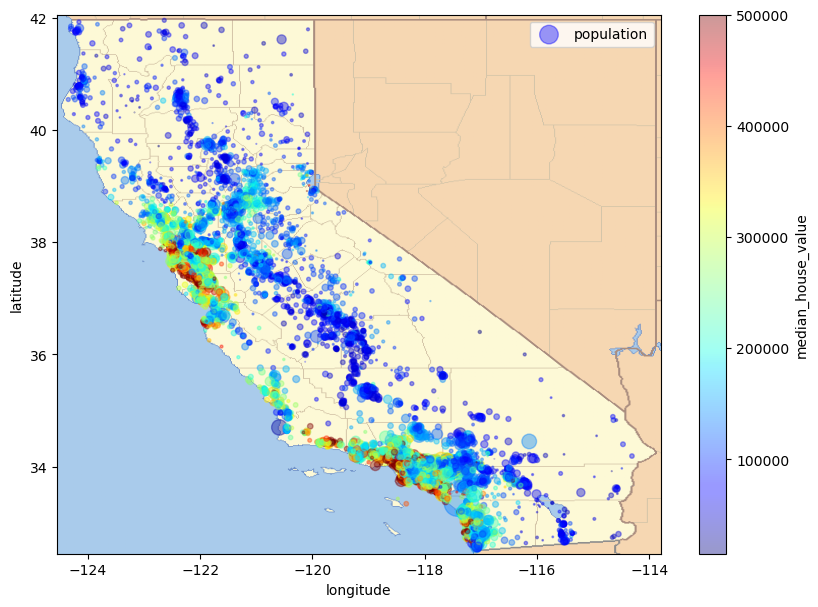

In [96]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# paths
images_path = os.path.join(".", "images", "end_to_end_project")
map_path = os.path.join(images_path, "california.png")

# read the map image
california_img = mpimg.imread(map_path)

# create ONE figure and axes
fig, ax = plt.subplots(figsize=(10,7))

# draw the map (set the geographic bounds of CA)
# extent = [xmin, xmax, ymin, ymax] = [lon_min, lon_max, lat_min, lat_max]
ax.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.9)

# overlay your scatter (size by population, color by median house value)
housing.plot(
    kind="scatter", x="longitude", y="latitude", ax=ax,
    s=housing["population"]/100, label="population", alpha=0.4,
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False
)

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.legend();            # semicolon suppresses printing the Legend object
plt.show()              # displays exactly ONE plot


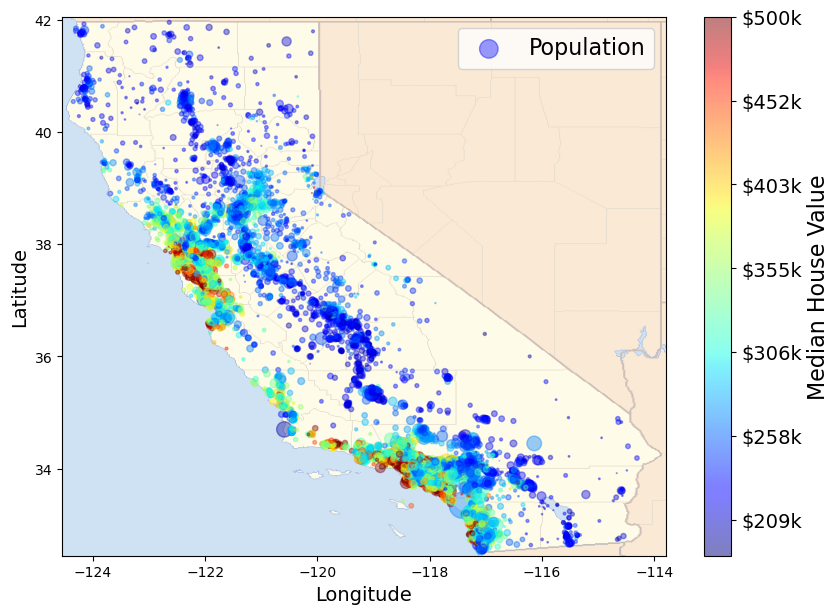

In [99]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16);
plt.show()

In [103]:
corr_matrix = housing.corr(numeric_only=True)

In [104]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

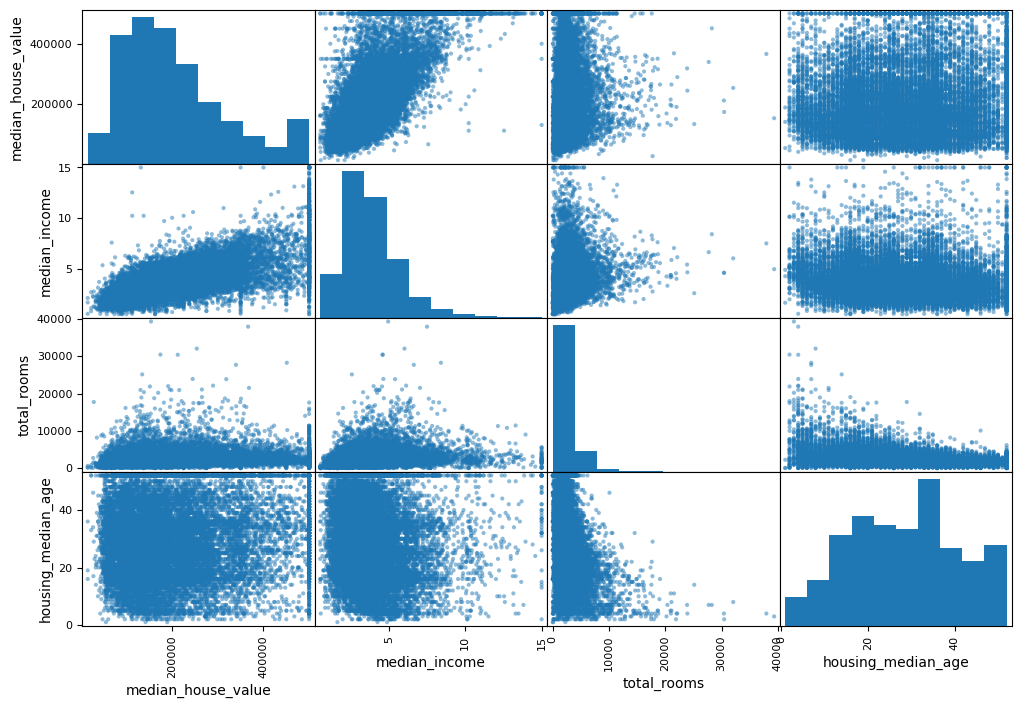

In [107]:
 from pandas.plotting import scatter_matrix
 attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
 scatter_matrix(housing[attributes], figsize=(12, 8));
plt.show()

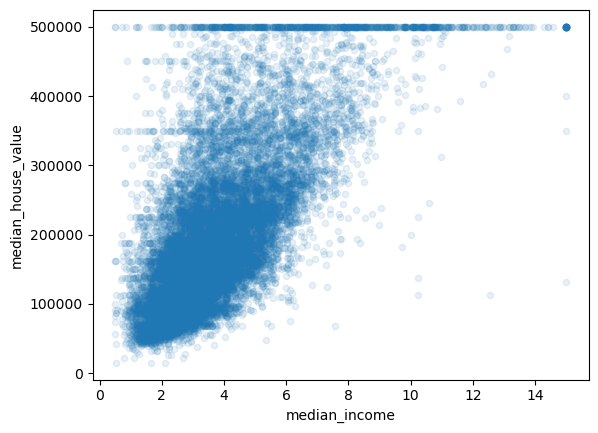

In [110]:
 housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1);
plt.show()

In [112]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [116]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [16]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [17]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [18]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [20]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [23]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_ #sklearn’s way (after fit())

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [25]:
housing_num.median().values #manual way

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [28]:
X = imputer.transform(housing_num) # Step 1: Transform with the imputer
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index) # Step 2: Convert back into DataFrame
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0


In [29]:
imputer.strategy

'median'

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [32]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.sample(10, random_state=42)   # 10 random rows

,ocean_proximity
20046,INLAND
3024,INLAND
15663,NEAR BAY
20484,<1H OCEAN
9814,NEAR OCEAN
13311,INLAND
7113,<1H OCEAN
7668,<1H OCEAN
18246,NEAR BAY
5723,<1H OCEAN


In [47]:
# Turn encoded result back into DataFrame
import pandas as pd
housing_cat_encoded_df = pd.DataFrame(housing_cat_encoded, columns=["ocean_proximity_encoded"])

# Show 10 random rows
housing_cat_encoded_df.sample(10, random_state=42)


,ocean_proximity_encoded
20046,1.0
3024,1.0
15663,3.0
20484,0.0
9814,4.0
13311,1.0
7113,0.0
7668,0.0
18246,3.0
5723,0.0


In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [51]:
housing_cat_1hot.toarray() #By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
cat_encoder = OneHotEncoder(sparse_output=False) #Alternatively, you can set sparse_output=False when creating the OneHotEncoder:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [55]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [11]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Accept a DataFrame so we can use column names
        df = X.copy()
        cols = {c.lower(): c for c in df.columns}

        if {"total_rooms","total_bedrooms","population","households"} <= set(cols):
            # Book CSV schema
            tr = cols["total_rooms"]; tb = cols["total_bedrooms"]
            pop = cols["population"]; hh = cols["households"]
            denom_hh = np.where(df[hh].to_numpy()==0, 1, df[hh].to_numpy())
            rooms_per_household = df[tr].to_numpy() / denom_hh
            population_per_household = df[pop].to_numpy() / denom_hh
            out = [df.to_numpy(), rooms_per_household, population_per_household]
            if self.add_bedrooms_per_room:
                denom_rooms = np.where(df[tr].to_numpy()==0, 1, df[tr].to_numpy())
                bedrooms_per_room = df[tb].to_numpy() / denom_rooms
                out.append(bedrooms_per_room)

        elif {"averooms","avebedrms","population","aveoccup"} <= set(cols):
            # sklearn fetch_california_housing schema (lowercased)
            ar = cols["averooms"]; ab = cols["avebedrms"]; ao = cols["aveoccup"]
            rooms_per_household = df[ar].to_numpy()          # already rooms/household
            population_per_household = df[ao].to_numpy()     # already population/household
            out = [df.to_numpy(), rooms_per_household, population_per_household]
            if self.add_bedrooms_per_room:
                denom_ar = np.where(df[ar].to_numpy()==0, 1, df[ar].to_numpy())
                bedrooms_per_room = df[ab].to_numpy() / denom_ar

                out.append(bedrooms_per_room)
        else:
            raise ValueError(
                "Expected either book CSV columns {total_rooms,total_bedrooms,population,households} "
                "or sklearn columns {AveRooms,AveBedrms,Population,AveOccup}."
                f"\nFound: {df.columns.tolist()}"
            )

        return np.c_[*out]

# Use it on the DataFrame (NOT .values)
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing)


In [13]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True, as_dataframe=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.as_dataframe = as_dataframe

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Work with a DataFrame so we can detect column names
        df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        name_map = {c.lower(): c for c in df.columns}

        out = []

        if {"total_rooms","total_bedrooms","population","households"} <= set(name_map):
            # Book CSV schema
            tr = name_map["total_rooms"]
            tb = name_map["total_bedrooms"]
            pop = name_map["population"]
            hh = name_map["households"]

            hh_d = np.where(df[hh].to_numpy()==0, 1, df[hh].to_numpy())
            rooms_per_household = df[tr].to_numpy() / hh_d
            population_per_household = df[pop].to_numpy() / hh_d
            out += [rooms_per_household, population_per_household]

            if self.add_bedrooms_per_room:
                tr_d = np.where(df[tr].to_numpy()==0, 1, df[tr].to_numpy())
                bedrooms_per_room = df[tb].to_numpy() / tr_d
                out += [bedrooms_per_room]

        elif {"averooms","avebedrms","population","aveoccup"} <= set(name_map):
            # sklearn fetch_california_housing schema
            ar = name_map["averooms"]
            ab = name_map["avebedrms"]
            ao = name_map["aveoccup"]

            rooms_per_household = df[ar].to_numpy()          # already rooms/household
            population_per_household = df[ao].to_numpy()     # already population/household
            out += [rooms_per_household, population_per_household]

            if self.add_bedrooms_per_room:
                ar_d = np.where(df[ar].to_numpy()==0, 1, df[ar].to_numpy())
                bedrooms_per_room = df[ab].to_numpy() / ar_d
                out += [bedrooms_per_room]
        else:
            raise ValueError(
                "Expected columns from either the book CSV "
                "{total_rooms,total_bedrooms,population,households} "
                "or sklearn dataset {AveRooms,AveBedrms,Population,AveOccup}. "
                f"Found: {df.columns.tolist()}"
            )

        extra = np.column_stack(out)
        names = ["rooms_per_household","population_per_household"] + \
                (["bedrooms_per_room"] if self.add_bedrooms_per_room else [])

        if self.as_dataframe:
            extra_df = pd.DataFrame(extra, columns=names, index=df.index)
            return pd.concat([df, extra_df], axis=1)
        else:
            return np.c_[df.to_numpy(), extra]

# ---- Use it (pass your DataFrame `housing`) ----
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True, as_dataframe=True)
housing_extra = attr_adder.transform(housing)  # works with either schema

# `housing_extra` now has the new columns:
# "rooms_per_household", "population_per_household", "bedrooms_per_room"


In [21]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval,rooms_per_household,population_per_household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,6.984127,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,6.238137,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,8.288136,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,5.817352,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,6.281853,2.181467


In [22]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# numeric-only frame
housing_num = housing.select_dtypes(include=[np.number]).copy()

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Work on a DataFrame and normalize column names
        df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        cols_lower = [str(c).lower() for c in df.columns]
        df = df.set_axis(cols_lower, axis=1, copy=False)

        out_cols = []

        if {"total_rooms","total_bedrooms","population","households"} <= set(df.columns):
            # Book CSV schema
            tr, tb, pop, hh = "total_rooms","total_bedrooms","population","households"
            hh_den = np.where(df[hh].to_numpy()==0, 1, df[hh].to_numpy())
            rooms_per_household = df[tr].to_numpy() / hh_den
            population_per_household = df[pop].to_numpy() / hh_den
            out_cols.extend([
                ("rooms_per_household", rooms_per_household),
                ("population_per_household", population_per_household),
            ])
            if self.add_bedrooms_per_room:
                tr_den = np.where(df[tr].to_numpy()==0, 1, df[tr].to_numpy())
                bedrooms_per_room = df[tb].to_numpy() / tr_den
                out_cols.append(("bedrooms_per_room", bedrooms_per_room))

        elif {"averooms","avebedrms","population","aveoccup"} <= set(df.columns):
            # sklearn fetch_california_housing schema
            ar, ab, ao = "averooms","avebedrms","aveoccup"
            out_cols.extend([
                ("rooms_per_household", df[ar].to_numpy()),
                ("population_per_household", df[ao].to_numpy()),
            ])
            if self.add_bedrooms_per_room:
                ar_den = np.where(df[ar].to_numpy()==0, 1, df[ar].to_numpy())
                bedrooms_per_room = df[ab].to_numpy() / ar_den
                out_cols.append(("bedrooms_per_room", bedrooms_per_room))
        else:
            raise ValueError(f"Unexpected columns: {list(df.columns)}")

        for name, arr in out_cols:
            df[name] = arr

        return df

# PIPELINE: adder -> imputer -> scaler
num_pipeline = Pipeline([
    ("attribs_adder", CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [23]:
housing_num_tr

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  0.62855945,
        -0.04959654, -1.1458328 ],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  0.32704136,
        -0.09251223, -0.98717456],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.15562047,
        -0.02584253, -1.44011541],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.09031802,
        -0.0717345 ,  0.03616742],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.04021111,
        -0.09122515,  0.11750623],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.07044252,
        -0.04368215,  0.1397813 ]])

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1) Split columns by dtype
num_attribs = housing.select_dtypes(include=[np.number]).columns.tolist()
cat_attribs = housing.select_dtypes(include=["object", "category"]).columns.tolist()
# (If you DO have the book CSV, cat_attribs will be ['ocean_proximity'].
# If you're using sklearn's dataset, cat_attribs will be [] and we’ll skip the cat pipeline.)

# 2) Your numeric pipeline (make sure CombinedAttributesAdder is defined as earlier)
num_pipeline = Pipeline([
    ("attribs_adder", CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

# 3) Build ColumnTransformer conditionally
transformers = [("num", num_pipeline, num_attribs)]
if cat_attribs:   # only add if categorical columns exist
    transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs))

full_pipeline = ColumnTransformer(transformers)

# 4) Transform
housing_prepared = full_pipeline.fit_transform(housing)
print("Prepared shape:", housing_prepared.shape)
print("Numeric cols:", len(num_attribs), " | Categorical cols:", cat_attribs)


Prepared shape: (20640, 12)
Numeric cols: 9  | Categorical cols: []


In [29]:
housing_prepared

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  0.62855945,
        -0.04959654, -1.1458328 ],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  0.32704136,
        -0.09251223, -0.98717456],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.15562047,
        -0.02584253, -1.44011541],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.09031802,
        -0.0717345 ,  0.03616742],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.04021111,
        -0.09122515,  0.11750623],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.07044252,
        -0.04368215,  0.1397813 ]])

In [30]:
housing_prepared.shape

(20640, 12)

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [33]:
from sklearn.preprocessing import OneHotEncoder

try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn ≥ 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # sklearn < 1.2

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', ohe),
])


In [34]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [36]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# ---- FIXED selector: keep DataFrame, not .values ----
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].copy()  # keep names!

# ---- OneHotEncoder (version-proof) ----
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn >=1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # sklearn <1.2

# ---- your numeric & categorical columns ----
num_attribs = housing.select_dtypes(include=[np.number]).columns.tolist()
cat_attribs = housing.select_dtypes(include=["object","category"]).columns.tolist()

# ---- your adder from earlier (works with DataFrame) ----
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None): return self
    def transform(self, X):
        df = X.copy()
        cols = [c.lower() for c in df.columns]
        df.columns = cols
        out = []
        if {"total_rooms","total_bedrooms","population","households"} <= set(cols):
            tr,tb,pop,hh = "total_rooms","total_bedrooms","population","households"
            hh_d = np.where(df[hh].to_numpy()==0, 1, df[hh].to_numpy())
            rooms_hh = df[tr].to_numpy()/hh_d
            pop_hh   = df[pop].to_numpy()/hh_d
            df["rooms_per_household"] = rooms_hh
            df["population_per_household"] = pop_hh
            if self.add_bedrooms_per_room:
                tr_d = np.where(df[tr].to_numpy()==0, 1, df[tr].to_numpy())
                df["bedrooms_per_room"] = df[tb].to_numpy()/tr_d
        elif {"averooms","avebedrms","population","aveoccup"} <= set(cols):
            df["rooms_per_household"] = df["averooms"]
            df["population_per_household"] = df["aveoccup"]
            if self.add_bedrooms_per_room:
                ar_d = np.where(df["averooms"].to_numpy()==0, 1, df["averooms"].to_numpy())
                df["bedrooms_per_room"] = df["avebedrms"].to_numpy()/ar_d
        else:
            raise ValueError(f"Unexpected columns: {list(df.columns)}")
        return df

# ---- OLD-style pipelines (FeatureUnion) with fixed selector ----
old_num_pipeline = Pipeline([
    ("selector", OldDataFrameSelector(num_attribs)),
    ("attribs_adder", CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

transformers = [("num", old_num_pipeline)]
if cat_attribs:
    old_cat_pipeline = Pipeline([
        ("selector", OldDataFrameSelector(cat_attribs)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", ohe),
    ])
    transformers.append(("cat", old_cat_pipeline))

old_full_pipeline = FeatureUnion(transformer_list=transformers)

# ---- Run ----
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared


array([[ 2.34476576,  0.98214266,  0.62855945, ...,  0.62855945,
        -0.04959654, -1.1458328 ],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  0.32704136,
        -0.09251223, -0.98717456],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.15562047,
        -0.02584253, -1.44011541],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.09031802,
        -0.0717345 ,  0.03616742],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.04021111,
        -0.09122515,  0.11750623],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.07044252,
        -0.04368215,  0.1397813 ]])

In [37]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [39]:
# Pick the dataframe that STILL has the target column.
# If you followed the book:
train_df = strat_train_set  # <- change if your variable name is different

# Detect the correct target column name
for _col in ["median_house_value", "MedHouseVal", "medhouseval"]:
    if _col in train_df.columns:
        target_col = _col
        break
else:
    raise ValueError("Could not find the target column in your training dataframe.")

# Build labels aligned to the feature rows you transformed
housing_labels = train_df.loc[housing.index, target_col].to_numpy()

# Now fit
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

print("X shape:", housing_prepared.shape, " y shape:", housing_labels.shape)


NameError: name 'strat_train_set' is not defined